# install cuml

In [ ]:
DEBUG = False
DEBUG_COUNTRY = ["GB"]

In [ ]:
pip install pynvml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 4.5 MB/s 


In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 300 (delta 74), reused 99 (delta 55), pack-reused 171
Receiving objects: 100% (300/300), 87.58 KiB | 393.00 KiB/s, done.
Resolving deltas: 100% (136/136), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:40
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

In [ ]:
import cudf
import io, requests

# download CSV file from GitHub
url="https://github.com/plotly/datasets/raw/master/tips.csv"
content = requests.get(url).content.decode('utf-8')

# read CSV from memory
tips_df = cudf.read_csv(io.StringIO(content))
tips_df['tip_percentage'] = tips_df['tip']/tips_df['total_bill']*100

# display average tip by dining party size
print(tips_df.groupby('size').tip_percentage.mean())

size
6    15.622920
1    21.729202
4    14.594901
3    15.215685
2    16.571919
5    14.149549
Name: tip_percentage, dtype: float64


In [ ]:
import cuml

# Create and populate a GPU DataFrame
df_float = cudf.DataFrame()
df_float['0'] = [1.0, 2.0, 5.0]
df_float['1'] = [4.0, 2.0, 1.0]
df_float['2'] = [4.0, 2.0, 1.0]

# Setup and fit clusters
dbscan_float = cuml.DBSCAN(eps=1.0, min_samples=1)
dbscan_float.fit(df_float)

print(dbscan_float.labels_)

# Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#交互式使用daaframe
%load_ext google.colab.data_table
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import random
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ["PYTHONHASHSEED"] = str(seed_value)
    

SEED = 42
set_seed(SEED)

In [ ]:
Train1=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/titanic/Trainbest.csv')
Test1=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/titanic/Testbest.csv')
Test1['Survived']=Test1['Survived'].astype('category',errors='ignore')#转换类型
#Train1['Survived']=Train1['Survived'].astype('category',errors='ignore')

In [ ]:
Feature=['FP','FS','wc','FamilySize']
x_train=Train1[Feature]
x_test=Test1[Feature]
y_train=Train1['Survived']
y_test=Test1['Survived']

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
normaler = Normalizer()
scaler = StandardScaler()
cols=x_train.columns
x_train[cols] = scaler.fit_transform(x_train[cols])
x_train[cols] = normaler.fit_transform(x_train[cols])
cols=x_test.columns
x_test[cols] = scaler.fit_transform(x_test[cols])
x_test[cols] = normaler.fit_transform(x_test[cols])
#p = normalize(p[:,np.newaxis], axis=0).ravel()

# Trian model

## CUML

### SVM

####cuml

In [ ]:
import time
from cuml.model_selection import train_test_split, GridSearchCV
from cuml.svm import SVC
cross_valid_scores = {}
start=time.time()
parameters = {
    "C": np.arange(0.1,0.2,step=0.01),
    "kernel": ["linear",],# "poly", "rbf", "sigmoid"
    "gamma": ["scale", "auto"],
}

model_svc = SVC(
    random_state=SEED,
    class_weight="balanced",
    probability=True,
)

model_svc = GridSearchCV(
    model_svc, 
    parameters, 
    cv=5,
    scoring='accuracy',
    verbose=3
)


svc_model=model_svc.fit(x_train, y_train)
end=time.time()
print('-----')
print("Time=",end-start)
print(f'Best parameters {model_svc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_svc.best_score_:.3f}'
)
cross_valid_scores['svc'] = model_svc.best_score_
print('-----')

#### sklearn

In [ ]:
from sklearn.svm import SVC
start=time.time()
parameters = {
    "C": np.arange(0.1,0.2,step=0.01),
    "kernel": ["linear",],# "poly", "rbf", "sigmoid"
    "gamma": ["scale", "auto"],
}

model_svc = SVC(
    random_state=SEED,
    class_weight="balanced",
    probability=True,
)

model_svc = GridSearchCV(
    model_svc, 
    parameters, 
    cv=5,
    scoring='accuracy',
    verbose=3
)


svc_model=model_svc.fit(x_train, y_train)
end=time.time()
print('-----')
print("Time=",end-start)
print(f'Best parameters {model_svc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_svc.best_score_:.3f}'
)
cross_valid_scores['svc'] = model_svc.best_score_
print('-----')

### XGB

In [ ]:
import xgboost as xgb
import time
start=time.time()
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma':[0],
    'max_delta_step':[0],
    'min_child_weight':[1],
    'min_split_loss':[0.01]
    
}

model_xgb = xgb.XGBClassifier(
    random_state=SEED,
    objective='binary:logistic',
    tree_method='gpu_hist',
    predictor='gpu_predictor'
)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=10,
    scoring='accuracy',
    verbose=3
)

xgb_model=model_xgb.fit(Train1.drop('Survived',axis=1), Train1.Survived)
end=time.time()
print('-----')
print("Time=",end-start)
print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_xgb.best_score_:.3f}'
)
cross_valid_scores['xgboost'] = model_xgb.best_score_
print('-----')

### Stacking

In [ ]:
best_param=svc_model.best_params_
svc_model_stack=SVC(
    random_state=SEED,
    class_weight="balanced",
    probability=True,
)
svc_model_stack.set_params(**best_param)

SVC(C=0.1, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

In [ ]:
best_param_xgboost

{'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 1,
 'min_split_loss': 0.01,
 'n_estimators': 25}

In [ ]:
best_param_xgboost=xgb_model.best_params_
parameters_stack_xgboost = {
    'max_depth': [9], 
    'n_estimators': [25],
    'learning_rate':  [0.1],
    'gamma':[0.1],
    'max_delta_step':[0],
    'min_child_weight':[1],
    'min_split_loss':[0.01]
    
}
xgb_model_stack = xgb.XGBClassifier(
    random_state=SEED,
    objective='binary:logistic',
)

xgb_model_stack.set_params(**best_param_xgboost)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=0, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, min_split_loss=0.01, missing=nan,
              monotone_constraints=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=None, tree_method=None, validate_parameters=None,
              verbosity=None)

In [ ]:
xgb_model_stack = GridSearchCV(
    xgb_model_stack, 
    parameters_stack_xgboost, 
    cv=10,
    scoring='accuracy',
    verbose=3
)

In [ ]:
xgb_model_stack

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective={'gamma': [0.1], 'learning_rate': [0.1],
                         'max_delta_step': [0], 'max_depth': [9],
                         'min_child_weight': [1], 'min_split_loss': [0.01],
                         'n_estimators': [25]},
              predictor=None, random_state=42, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.regressor import StackingCVRegressor
from mlxtend.classifier import StackingCVClassifier
from sklearn import model_selection
from cuml.linear_model import LogisticRegression
lr = LogisticRegression()
stack = StackingCVClassifier(classifiers=[xgb_model_stack,svc_model_stack],
                            meta_classifier=lr, cv=10,
                            use_features_in_secondary=False,
                            store_train_meta_features=True,
                            shuffle=False)

In [ ]:
stack

StackingCVClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                enable_categorical=False,
                                                gamma=0, gpu_id=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=0.1,
                                                max_delta_step=0, max_depth=9,
                                                min_child_weight=1,
                                                min_split_loss=0.01,
                                                missing=nan,
                                                monotone_cons...
      

In [ ]:
for clf, label in zip([xgb_model_stack, svc_model_stack,stack], 
                      ['xgb', 
                       'svc', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf,x_train , y_train,cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

In [ ]:
result=stack.fit(x_train.values ,y_train.values)

/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:50:13] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:50:13] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:50:13] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:50:13] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_163902267126

/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:50:57] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


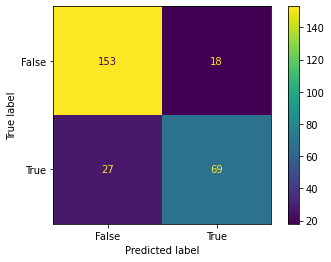

In [ ]:
from sklearn import metrics
pred = stack.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
## Import the library and functions you need
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
## Accuracy
print("Accuracy:",accuracy_score(y_test,pred))
## Precision
print("Precision:",precision_score(y_test,pred))
## Recall
print("Recall:",recall_score(y_test,pred))
## F1 Score
print("F1:",f1_score(y_test,pred))

Accuracy: 0.8314606741573034
Precision: 0.7931034482758621
Recall: 0.71875
F1: 0.7540983606557378


In [ ]:
result.meta_clf_.intercept_

array([-4.30152593])

In [ ]:
result.meta_clf_.coef_

array([[ 0.0060639 ],
       [ 3.01551109],
       [ 0.54528518],
       [-0.10738764],
       [ 1.5173679 ],
       [ 0.93014286]])

In [ ]:
result.score(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.8846153846153846